In [3]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pointbiserialr
import statsmodels.api as sm
from statsmodels.formula.api import ols


pd.set_option("display.max_columns", None)

In [4]:
# Define a dictionary to store DataFrames for each year
incident_dfs = {}
victim_dfs = {}
offense_dfs = {}
weapons_dfs = {}


selected_incident_dfs = {}
selected_victim_dfs = {}
selected_offense_dfs = {}
# List of years
years = [2012, 2013, 2014, 2015, 2016]

# Load and concatenate the data for each year
for year in years:
    # Load and concatenate dataframes for the current year
    incident_dfs[year] = pd.read_csv(f'{year}_Incident.csv')
    victim_dfs[year] = pd.read_csv(f'{year}_Victim_Person.csv')
    offense_dfs[year] = pd.read_csv(f'{year}_Offenses.csv')
    weapons_dfs[year] = pd.read_csv(f'{year}_Weapons.csv')

    selected_incident_dfs[year] = incident_dfs[year][["Complaint_No", "Reported_Date", "Clearance_Date", "X_Coordinate", "Y_Coordinate", "Place2", "NIBRS_Hi_Class"]]
    selected_victim_dfs[year] = victim_dfs[year][["Complaint_No", "Victim_No", "Victim_Age", "Victim_Race", "Victim_Gender", "Victim_Ethnicity"]]
    selected_offense_dfs[year] = offense_dfs[year][["Complaint_No","off_nibrs_classification"]]

C:\Users\stewi\AppData\Local\Temp\ipykernel_2712\3731998213.py:17: DtypeWarning: Columns (17,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_dfs[year] = pd.read_csv(f'{year}_Incident.csv')


In [5]:
HouseHold_Data =pd.read_csv("HouseHold_Data.csv")
PopAge =pd.read_csv("PopAge.csv")
Household_Renter = pd.read_csv("Household(Size)-Renter.csv")
Education =pd.read_csv("Education.csv")



In [6]:
GEOID_DF = pd.read_csv('merged8_SJ5.csv')
GEOID_DF['Complaint_No'] = pd.to_numeric(GEOID_DF['Complaint_No'], errors='coerce')
# Convert non-blank rows to integers and replace blank rows with a specific integer (e.g., -1)
GEOID_DF['GEOID20'] = pd.to_numeric(GEOID_DF['GEOID20'], errors='coerce')
#GEOID.dropna(axis=1, how='all', inplace=True)
#GEOID_DF['Complaint_No'] = GEOID_DF['Complaint_No'].astype('int64')
#GEOID_DF["GEOID20"].replace(r'^\s+$', np.nan, regex = True, inplace = True)
#GEOID_DF['GEOID20'] = GEOID_DF['GEOID20'].astype('int64')

all_incident_dfs = pd.concat(selected_incident_dfs.values(), ignore_index = True)
all_victim_dfs = pd.concat(selected_victim_dfs.values(), ignore_index = True)
all_offense_dfs = pd.concat(selected_offense_dfs.values(), ignore_index = True)
all_weapons_dfs = pd.concat(weapons_dfs.values(), ignore_index = True)
    

merged_df_a= pd.merge(all_incident_dfs, all_victim_dfs, on = "Complaint_No", how = "left")
merged_df_b= pd.merge(merged_df_a, all_offense_dfs, on = "Complaint_No", how = "left")
merged_df_c= pd.merge(merged_df_b, all_weapons_dfs, on = "Complaint_No", how = "left")
merged_df_d = pd.merge(merged_df_c, GEOID_DF, on = "Complaint_No", how = "left")

merged_df_e = pd.merge(merged_df_d, HouseHold_Data, on = "GEOID20", how = "left")
merged_df_f = pd.merge(merged_df_e, PopAge, on = "GEOID20", how = "left")
merged_df_g = pd.merge(merged_df_f, Household_Renter, on = "GEOID20", how = "left")
merged_df = pd.merge(merged_df_g, Education, on = "GEOID20", how = "left")




merged_df = merged_df.drop_duplicates(subset=['Complaint_No'])
merged_df.index = [x for x in range(1, len(merged_df) + 1)]
merged_df.index.name = "Record"


merged_df.rename(columns = {"Place2": "Location_Type"}, inplace = True)
merged_df.head(20) 


,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Households!!Total,"Estimate!!Households!!Total!!$35,000 to $49,998","Estimate!!Households!!Total!!$50,000 to $74,998","Estimate!!Households!!Total!!$75,000 to $99,998","Estimate!!Households!!Total!!$100,000 to $149,998","Estimate!!Households!!Total!!$150,000 to $199,998","Estimate!!Households!!Total!!$200,000 or more",Estimate!!Total!!Total population!!AGE!!5 to 9 years,Estimate!!Total!!Total population!!AGE!!10 to 14 years,Estimate!!Total!!Total population!!AGE!!15 to 19 years,Estimate!!Total!!Total population!!AGE!!20 to 24 years,Estimate!!Total!!Total population!!AGE!!25 to 29 years,Estimate!!Total!!Total population!!AGE!!30 to 34 years,Estimate!!Total!!Total population!!AGE!!35 to 39 years,Estimate!!Total!!Total population!!AGE!!40 to 44 years,Estimate!!Total!!Total population!!AGE!!45 to 49 years,Estimate!!Total!!Total population!!AGE!!50 to 54 years,Estimate!!Total!!Total population!!AGE!!55 to 59 years,Estimate!!Total!!Total population!!AGE!!60 to 64 years,Estimate!!Total!!Total population!!AGE!!65 to 69 years,Estimate!!Total!!Total population!!AGE!!70 to 74 years,Estimate!!Total!!HOUSEHOLDS!!Total households,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Total families,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Estimate!!Total!!Total households!!HOUSING TENURE!!Owner-occupied housing units,Estimate!!Total!!Total households!!HOUSING TENURE!!Renter-occupied housing units,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency),Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associates degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelors degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade,"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency),"Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree",Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associates degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelors degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelors degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!Bachelors degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!High school graduate or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!Bachelors degree or higher,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 year

In [7]:
pd.set_option("display.max_rows", 100)
merged_df.groupby("Location_Type").size().sort_values()
#pd.reset_option('display.max_rows')

Location_Type
06/26/2014 2147                                                                          1
Mobile Home Dealership                                                                   2
Taxi Company                                                                             4
Bus - Non-Specific                                                                       8
Illegal/Unlicensed Liquor Establishment                                                 12
Salvage Yard                                                                            20
Video Store                                                                             35
School/College                                                                          38
Bus - Charter/Tour Bus                                                                  70
Lake                                                                                    80
Cemetery                                                                    

In [8]:
import pandas as pd

# Columns to conjoin and sum by groups
columns_to_conjoin = [
    'Estimate!!Total!!Total population!!AGE!!5 to 9 years',
    'Estimate!!Total!!Total population!!AGE!!10 to 14 years',
    'Estimate!!Total!!Total population!!AGE!!15 to 19 years',
    'Estimate!!Total!!Total population!!AGE!!20 to 24 years',
    'Estimate!!Total!!Total population!!AGE!!25 to 29 years',
    'Estimate!!Total!!Total population!!AGE!!30 to 34 years',
    'Estimate!!Total!!Total population!!AGE!!35 to 39 years',
    'Estimate!!Total!!Total population!!AGE!!40 to 44 years',
    'Estimate!!Total!!Total population!!AGE!!45 to 49 years',
    'Estimate!!Total!!Total population!!AGE!!50 to 54 years',
    'Estimate!!Total!!Total population!!AGE!!55 to 59 years',
    'Estimate!!Total!!Total population!!AGE!!60 to 64 years',
    'Estimate!!Total!!Total population!!AGE!!65 to 69 years',
    'Estimate!!Total!!Total population!!AGE!!70 to 74 years',
    'Estimate!!Total!!FAMILIES!!Total families',
    'Estimate!!Total!!HOUSEHOLDS!!Total households',
    'Estimate!!Households!!Total',
    'Estimate!!Households!!Total!!$35,000 to $49,998',
    'Estimate!!Households!!Total!!$50,000 to $74,998',
    'Estimate!!Households!!Total!!$75,000 to $99,998',
    'Estimate!!Households!!Total!!$100,000 to $149,998',
    'Estimate!!Households!!Total!!$150,000 to $199,998',
    'Estimate!!Households!!Total!!$200,000 or more',
    
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Less than 9th grade',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!9th to 12th grade, no diploma',
    
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate (includes equivalency)',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!High school graduate or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!High school graduate or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Some college, no degree',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!High school graduate or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!High school graduate or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!High school graduate or higher',
    
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associates degree',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelors degree or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Associates degree',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelors degree',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Graduate or professional degree',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelors degree or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years!!Bachelors degree or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years!!Bachelors degree or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years!!Bachelors degree or higher',
    'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over!!Bachelors degree or higher',
]

# Convert income columns to integer
income_columns = [
    'Estimate!!Households!!Total!!$35,000 to $49,998',
    'Estimate!!Households!!Total!!$50,000 to $74,998',
    'Estimate!!Households!!Total!!$75,000 to $99,998',
    'Estimate!!Households!!Total!!$100,000 to $149,998',
    'Estimate!!Households!!Total!!$150,000 to $199,998',
    'Estimate!!Households!!Total!!$200,000 or more'
]
# Replace non-numeric values with NaN
merged_df[income_columns] = merged_df[income_columns].apply(pd.to_numeric, errors='coerce')

# Round income columns to the nearest whole number
merged_df[income_columns] = merged_df[income_columns].round()
merged_df[income_columns] = merged_df[income_columns].fillna(0)
merged_df[income_columns] = merged_df[income_columns].astype(int)

# Now, perform the sum for income groups
merged_df['Low Income (less than 74,998)'] = merged_df[income_columns[0:1]].sum(axis=1)
merged_df['Medium Income (75,000 through 149,998)'] = merged_df[income_columns[2:3]].sum(axis=1)
merged_df['High Income (greater than 149,998)'] = merged_df[income_columns[4:]].sum(axis=1)

# Drop the original income columns
merged_df = merged_df.drop(columns=income_columns)

# Modify columns_to_conjoin to exclude income columns
columns_to_conjoin = [col for col in columns_to_conjoin if col not in income_columns]

# Create a new column for each age group and sum the corresponding columns
merged_df['Aged 5-19'] = merged_df[columns_to_conjoin[0:3]].sum(axis=1)
merged_df['Aged 20-29'] = merged_df[columns_to_conjoin[3:5]].sum(axis=1)
merged_df['Aged 30-44'] = merged_df[columns_to_conjoin[5:8]].sum(axis=1)
merged_df['Aged 45-59'] = merged_df[columns_to_conjoin[8:11]].sum(axis=1)
merged_df['Less Than High School Graduate'] = merged_df[columns_to_conjoin[23:26]].sum(axis=1)
merged_df['High School Graduate or Higher'] = merged_df[columns_to_conjoin[26:34]].sum(axis=1)
merged_df['Bachelors Degree or Higher'] = merged_df[columns_to_conjoin[34:]].sum(axis=1)

# Drop the original columns
merged_df = merged_df.drop(columns=columns_to_conjoin)



In [9]:
merged_df = merged_df.rename(columns={
    'Estimate!!Total!!Total households!!HOUSING TENURE!!Owner-occupied housing units': 'Owner_Occupied_Households',
    'Estimate!!Total!!Total households!!HOUSING TENURE!!Renter-occupied housing units': 'Renter_Occupied_Households'
})

In [10]:
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50,Black,M,Other/Not Listed ...,Missing Person ...,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0
2,20120616144400,6/16/12,,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26,White,F,Unknown/Refused ...,Theft of Motor Vehicle Parts from Vehicle ...,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0
3,20120616144700,6/16/12,,1454309,549845,Other - Commercial Place ...,All Other Thefts ...,NaN,NaN,NaN,NaN,NaN,All Other Thefts ...,NaN,3.711901e+10,2.1,3.81,42.0,32,68,199.0,1168.0,384.0,224.0,354.0,206.0,17,4,3,276.0,290.0,425.0,302.0,826.0,952.0,166.0
4,20120616145104,6/16/12,,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35,Black,F,Other/Not Listed ...,Damage/Vandalism Of Property ...,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26,Black,M,Unknown/Refused ...,Intimidation ...,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28,Black,F,Other/Not Listed ...,Robbery ...,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0
454498,20161231234200,12/31/16,,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34,White,M,Hispanic/Latino ...,Theft From Motor Vehicle ...,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0
454499,20161231234901,12/31/16,,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22,Black,F,Unknown/Refused ...,Theft From Motor Vehicle ...,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,210.0,1146.0,403.0,181.0,361.0,201.0,19,34,2,592.0,236.0,506.0,336.0,843.0,1068.0,283.0


In [11]:
merged_df.columns

Index(['Complaint_No', 'Reported_Date', 'Clearance_Date', 'X_Coordinate',
       'Y_Coordinate', 'Location_Type', 'NIBRS_Hi_Class', 'Victim_No',
       'Victim_Age', 'Victim_Race', 'Victim_Gender', 'Victim_Ethnicity',
       'off_nibrs_classification', 'Weapon_Type', 'GEOID20',
       'Estimate!!Total!!HOUSEHOLDS!!Average household size',
       'Estimate!!Total!!FAMILIES!!Average family size',
       'Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years',
       'Owner_Occupied_Households', 'Renter_Occupied_Households',
       'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years',
       'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over',
       'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years',
       'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years',
       'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years',
  

In [12]:
print(GEOID_DF['GEOID20'].dtype)
print(merged_df['GEOID20'].dtype)


float64
float64


In [13]:
merged_df.to_csv(r"C:\Users\stewi\Downloads\merged9.csv", index = True)
#GEOID_DF.to_csv(r"C:\Users\stewi\Downloads\GEOID.csv", index = True)

In [14]:
merged_df["Clearance_Date"].replace(r'^\s+$', "Not Cleared", regex = True, inplace = True)
merged_df["Victim_Age"].replace(r'^\s+$', np.nan, regex = True, inplace = True)
merged_df["Victim_Race"].replace(r'^\s+$', np.nan, regex = True, inplace = True)
merged_df["Victim_Gender"].replace(r'^\s+$', np.nan, regex = True, inplace = True)
merged_df["Location_Type"].replace(r'^\s+$', np.nan, regex = True, inplace = True)
merged_df["off_nibrs_classification"].replace(r'^\s+$', np.nan, regex = True, inplace = True)
merged_df.off_nibrs_classification = merged_df.off_nibrs_classification.replace(r'\s+', '', regex=True)
merged_df.replace({' +':' '},regex=True)
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0
3,20120616144700,6/16/12,Not Cleared,1454309,549845,Other - Commercial Place ...,All Other Thefts ...,NaN,NaN,NaN,NaN,NaN,AllOtherThefts,NaN,3.711901e+10,2.1,3.81,42.0,32,68,199.0,1168.0,384.0,224.0,354.0,206.0,17,4,3,276.0,290.0,425.0,302.0,826.0,952.0,166.0
4,20120616145104,6/16/12,Not Cleared,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35,Black,F,Other/Not Listed ...,Damage/VandalismOfProperty,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26,Black,M,Unknown/Refused ...,Intimidation,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,Not Cleared,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28,Black,F,Other/Not Listed ...,Robbery,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0
454498,20161231234200,12/31/16,Not Cleared,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34,White,M,Hispanic/Latino ...,TheftFromMotorVehicle,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0
454499,20161231234901,12/31/16,Not Cleared,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22,Black,F,Unknown/Refused ...,TheftFromMotorVehicle,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,210.0,1146.0,403.0,181.0,361.0,201.0,19,34,2,592.0,236.0,506.0,336.0,843.0,1068.0,283.0


In [15]:
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0
3,20120616144700,6/16/12,Not Cleared,1454309,549845,Other - Commercial Place ...,All Other Thefts ...,NaN,NaN,NaN,NaN,NaN,AllOtherThefts,NaN,3.711901e+10,2.1,3.81,42.0,32,68,199.0,1168.0,384.0,224.0,354.0,206.0,17,4,3,276.0,290.0,425.0,302.0,826.0,952.0,166.0
4,20120616145104,6/16/12,Not Cleared,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35,Black,F,Other/Not Listed ...,Damage/VandalismOfProperty,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26,Black,M,Unknown/Refused ...,Intimidation,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,Not Cleared,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28,Black,F,Other/Not Listed ...,Robbery,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0
454498,20161231234200,12/31/16,Not Cleared,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34,White,M,Hispanic/Latino ...,TheftFromMotorVehicle,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0
454499,20161231234901,12/31/16,Not Cleared,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22,Black,F,Unknown/Refused ...,TheftFromMotorVehicle,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,210.0,1146.0,403.0,181.0,361.0,201.0,19,34,2,592.0,236.0,506.0,336.0,843.0,1068.0,283.0


In [16]:
#merged_df.to_csv(r"C:\Users\stewi\Downloads\merged7.csv", index = False)

In [17]:
pd.set_option("display.max_rows", 100)
#offense_df_orig_2012=pd.read_csv(f'{2012}_Offenses.csv')
merged_df.groupby("off_nibrs_classification").size().sort_values()

off_nibrs_classification
GasLeak                                      1
Bribery                                      1
WelfareFraud                                 6
NegligentManslaughter                        6
AssistingGambling                           10
Betting/Wagering                            11
Incest                                      27
AssistingProstitution                       34
JustifiableHomicide                         36
GamblingEquipmentViolations                 52
DogBite/AnimalControlIncident               64
SexualAssaultWithObject                     70
PeepingTom                                 103
WorthlessCheck:Felony(over$2000)           106
Kidnapping                                 111
Curfew/Loitering/VagrancyViolations        118
TheftFromCoin-OperatedMachineOrDevice      133
Extortion/Blackmail                        133
Pornography/ObsceneMaterial                162
Fire(Accidental/Non-Arson)                 221
ForcibleSodomy                     

In [18]:
pd.reset_option('display.max_rows')

In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 454501 entries, 1 to 454501
Data columns (total 36 columns):
 #   Column                                                                                                Non-Null Count   Dtype  
---  ------                                                                                                --------------   -----  
 0   Complaint_No                                                                                          454501 non-null  int64  
 1   Reported_Date                                                                                         454501 non-null  object 
 2   Clearance_Date                                                                                        454501 non-null  object 
 3   X_Coordinate                                                                                          454501 non-null  object 
 4   Y_Coordinate                                                                                     

In [20]:
columns = merged_df.columns
for col in columns:
    print('****',col,'****')
    print(merged_df[col].describe())

**** Complaint_No ****
count    4.545010e+05
mean     2.014147e+13
std      1.425378e+10
min      2.012010e+13
25%      2.013050e+13
50%      2.014082e+13
75%      2.015111e+13
max      2.016123e+13
Name: Complaint_No, dtype: float64
**** Reported_Date ****
count      454501
unique       1826
top       5/31/16
freq          382
Name: Reported_Date, dtype: object
**** Clearance_Date ****
count          454501
unique           1981
top       Not Cleared
freq           254858
Name: Clearance_Date, dtype: object
**** X_Coordinate ****
count            454501
unique            65997
top                    
freq              33622
Name: X_Coordinate, dtype: object
**** Y_Coordinate ****
count            454501
unique            70921
top                    
freq              33622
Name: Y_Coordinate, dtype: object
**** Location_Type ****
count                                                454501
unique                                                   71
top       Private Residence         

In [21]:
merged_df.groupby("Victim_Age").size().sort_values()

Victim_Age
97      12
96      14
98      15
95      20
99      26
      ... 
26    5741
27    5863
23    5867
25    5975
24    5993
Length: 100, dtype: int64

In [22]:
#Definea mapping of crimes to their categories
crime_category_mapping={
"NegligentManslaughter":"Violent",
"JustifiableHomicide":"Violent",
"SexualAssaultWithObject":"Violent",
"Kidnapping":"Violent",
"ForcibleSodomy":"Violent",
"ForcibleRape":"Violent",
"ForcibleFondling":"Violent",
"Murder":"Violent",
"Robbery":"Violent",
"AggravatedAssault":"Violent",
"TheftFromCoin-OperatedMachineOrDevice":"Non-Violent",
"AssistingProstitution":"Non-Violent",
"Pornography/ObsceneMaterial":"Non-Violent",
'WelfareFraud':'Non-Violent',
'Curfew/Loitering/VagrancyViolations':'Non-Violent',
'LiquorLawViolations':'Non-Violent',
'Embezzlement':'Non-Violent',
'Incest':'Non-Violent',
'DisorderlyConduct':'Non-Violent',
'DogBite/AnimalControlIncident':'Non-Violent',
'WorthlessCheck:Felony(over$2000)':'Non-Violent',
'WeaponLawViolations':'Non-Violent',
'PeepingTom':'Non-Violent',
'Extortion/Blackmail':'Non-Violent',
'StatutoryRape':'Non-Violent',
'DrugEquipmentViolations':'Non-Violent',
'Fire(Accidental/Non-Arson)':'Non-Violent',
'WireFraud':'Non-Violent',
'IndecentExposure':'Non-Violent',
'Drug/NarcoticViolations':'Non-Violent',
'TrespassOfRealProperty':'Non-Violent',
'DrivingUnderTheInfluence':'Non-Violent',
'PublicAccident':'Non-Violent',
'FamilyOffenses;Nonviolent':'Non-Violent',
'VehicleRecovery':'Non-Violent',
'Arson':'Non-Violent',
'Affray':'Non-Violent',
'Overdose':'Non-Violent',
'Pocket-Picking':'Non-Violent',
'Purse-Snatching':'Non-Violent',
'Shoplifting':'Non-Violent',
'Sudden/NaturalDeathInvestigation':'Non-Violent',
'Counterfeiting/Forgery':'Non-Violent',
'Suicide':'Violent',
'StolenPropertyOffenses':'Non-Violent',
'FalsePretenses/Swindle':'Non-Violent',
'TheftofMotorVehiclePartsfromVehicle':'Non-Violent',
'TheftFromBuilding':'Non-Violent',
'Impersonation':'Non-Violent',
'CreditCard/TellerFraud':'Non-Violent',
'MissingPerson':'Non-Violent',
'OtherUnlistedNon-Criminal':'Non-Violent',
'HitAndRun(PropertyOnly)':'Non-Violent',
'MotorVehicleTheft':'Non-Violent',
'AllOtherOffenses':'Non-Violent',
'Damage/VandalismOfProperty':'Non-Violent',
'Intimidation':'Non-Violent',
'AllOtherThefts':'Non-Violent',
'Burglary/B&E':'Non-Violent',
'TheftFromMotorVehicle':'Non-Violent',
'SimpleAssault':'Violent',
}

#Createanewcolumn'Crime_Category'basedonthemapping
merged_df['off_classification_vn']=merged_df['off_nibrs_classification'].map(crime_category_mapping)

#DisplaytheDataFramewiththenew'Crime_Category'column
print(merged_df[['off_nibrs_classification','off_classification_vn']])

                   off_nibrs_classification off_classification_vn
Record                                                           
1                             MissingPerson           Non-Violent
2       TheftofMotorVehiclePartsfromVehicle           Non-Violent
3                            AllOtherThefts           Non-Violent
4                Damage/VandalismOfProperty           Non-Violent
5                              Intimidation           Non-Violent
...                                     ...                   ...
454497                              Robbery               Violent
454498                TheftFromMotorVehicle           Non-Violent
454499                TheftFromMotorVehicle           Non-Violent
454500           Damage/VandalismOfProperty           Non-Violent
454501                         Burglary/B&E           Non-Violent

[454501 rows x 2 columns]


In [23]:
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,off_classification_vn
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0,Non-Violent
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0,Non-Violent
3,20120616144700,6/16/12,Not Cleared,1454309,549845,Other - Commercial Place ...,All Other Thefts ...,NaN,NaN,NaN,NaN,NaN,AllOtherThefts,NaN,3.711901e+10,2.1,3.81,42.0,32,68,199.0,1168.0,384.0,224.0,354.0,206.0,17,4,3,276.0,290.0,425.0,302.0,826.0,952.0,166.0,Non-Violent
4,20120616145104,6/16/12,Not Cleared,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35,Black,F,Other/Not Listed ...,Damage/VandalismOfProperty,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0,Non-Violent
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26,Black,M,Unknown/Refused ...,Intimidation,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0,Non-Violent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,Not Cleared,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28,Black,F,Other/Not Listed ...,Robbery,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0,Violent
454498,20161231234200,12/31/16,Not Cleared,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34,White,M,Hispanic/Latino ...,TheftFromMotorVehicle,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0,Non-Violent
454499,20161231234901,12/31/16,Not Cleared,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22,Black,F,Unknown/Refused ...,TheftFromMotorVehicle,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,210.0,1146.0,403.0,181.0,361.0,201.0,19,34,2,592.0,236.0,506.0,336.0,843.0,1068.0,283.0,Non-Violent


In [24]:
merged_df.rename(columns=lambda x: x.strip(), inplace=True)
print(merged_df)

          Complaint_No Reported_Date Clearance_Date X_Coordinate Y_Coordinate  \
Record                                                                          
1       20120616144301       6/16/12        6/16/12      1446430       583618   
2       20120616144400       6/16/12    Not Cleared      1459634       549425   
3       20120616144700       6/16/12    Not Cleared      1454309       549845   
4       20120616145104       6/16/12    Not Cleared      1453368       579593   
5       20120616145201       6/16/12        6/18/12      1488226       537239   
...                ...           ...            ...          ...          ...   
454497  20161231234101      12/31/16    Not Cleared      1448960       542949   
454498  20161231234200      12/31/16    Not Cleared      1474872       564567   
454499  20161231234901      12/31/16    Not Cleared      1482291       554972   
454500  20161231235000      12/31/16    Not Cleared      1441206       551129   
454501  20161231235500      

In [25]:
# Ensure the 'Victim_Age' column contains only numeric values
merged_df['Victim_Age'] = pd.to_numeric(merged_df['Victim_Age'], errors='coerce')

#Aged 5-19	Aged 20-29	Aged 30-44	Aged 45-59
# Define the age bins and labels
age_bins = [5, 19, 29, 44, 59, float('inf')]
age_labels = ["Child", "Young Adult", "Adult", "Matured Adult", "Senior"]

# Use pd.cut to create the 'binned_ages' column
merged_df['binned_ages_classification'] = pd.cut(merged_df['Victim_Age'], bins=age_bins, labels=age_labels, right=False)

# Display the first few rows of the updated DataFrame
print(merged_df[['Victim_Age', 'binned_ages_classification']].head(20))


# Create a new column 'binned_age_numbers' with numeric bin codes
merged_df['binned_age_numbers'] = merged_df['binned_ages_classification'].cat.codes

# Display the first few rows of the updated DataFrame
print(merged_df[['Victim_Age', 'binned_ages_classification', 'binned_age_numbers']].head(20))

# Create a 'binned_ages' column with age group labels based on the following bins:
# - "Child" for ages 5 - 18
# - "Young Adult" for ages < 25
# - "Adult" for ages < 35
# - "Matured Adult" for ages < 50
# - "Senior" for ages >= 50

        Victim_Age binned_ages_classification
Record                                       
1             50.0              Matured Adult
2             26.0                Young Adult
3              NaN                        NaN
4             35.0                      Adult
5             26.0                Young Adult
6             62.0                     Senior
7             18.0                      Child
8              NaN                        NaN
9             42.0                      Adult
10            61.0                     Senior
11            24.0                Young Adult
12            24.0                Young Adult
13             NaN                        NaN
14            61.0                     Senior
15            22.0                Young Adult
16            52.0              Matured Adult
17             NaN                        NaN
18            54.0              Matured Adult
19            31.0                      Adult
20            60.0                

In [26]:
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,off_classification_vn,binned_ages_classification,binned_age_numbers
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50.0,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0,Non-Violent,Matured Adult,3
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26.0,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0,Non-Violent,Young Adult,1
3,20120616144700,6/16/12,Not Cleared,1454309,549845,Other - Commercial Place ...,All Other Thefts ...,NaN,NaN,NaN,NaN,NaN,AllOtherThefts,NaN,3.711901e+10,2.1,3.81,42.0,32,68,199.0,1168.0,384.0,224.0,354.0,206.0,17,4,3,276.0,290.0,425.0,302.0,826.0,952.0,166.0,Non-Violent,NaN,-1
4,20120616145104,6/16/12,Not Cleared,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35.0,Black,F,Other/Not Listed ...,Damage/VandalismOfProperty,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0,Non-Violent,Adult,2
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26.0,Black,M,Unknown/Refused ...,Intimidation,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0,Non-Violent,Young Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,Not Cleared,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28.0,Black,F,Other/Not Listed ...,Robbery,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0,Violent,Young Adult,1
454498,20161231234200,12/31/16,Not Cleared,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34.0,White,M,Hispanic/Latino ...,TheftFromMotorVehicle,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0,Non-Violent,Adult,2
454499,20161231234901,12/31/16,Not Cleared,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22.0,Black,F,Unknown/Refused ...,TheftFromMotorVehicle,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,210.0,1146.0,403.0,181.0,361.0,201.0,19,34,2,592.0,236.0,506.0,336.0,843.0,1068.0,283.0,Non-Violent,Young Adult,1


C:\Users\stewi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='Victim_Age'>

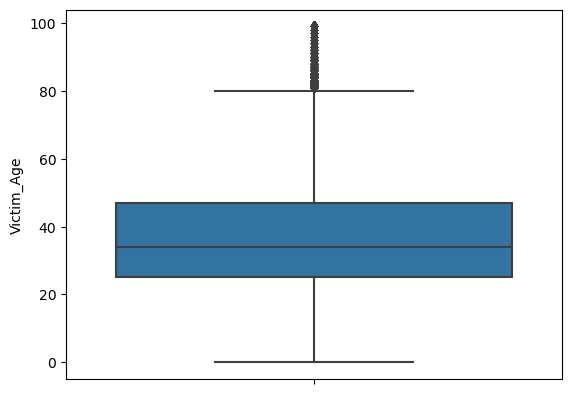

In [27]:
#Proceed to find the distributions of age for the rest of the years to see what ages has more representation over the different years.
#Using the 2013 dataframe to find the distribution
merged_df['Victim_Age'] = pd.to_numeric(merged_df['Victim_Age'], errors='coerce')
sns.boxplot(y=merged_df['Victim_Age'])

In [28]:
#Removing outliers
quartile_low = merged_df["Victim_Age"].quantile(0.01)
quartile_high = merged_df["Victim_Age"].quantile(0.99)

merged_df = merged_df[(merged_df["Victim_Age"] < quartile_high) & (merged_df["Victim_Age"] > quartile_low)]

C:\Users\stewi\AppData\Local\Temp\ipykernel_2712\939594719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Victim_Age'] = pd.to_numeric(merged_df['Victim_Age'], errors='coerce')
C:\Users\stewi\AppData\Local\Temp\ipykernel_2712\939594719.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Age_Group'] = pd.cut(x=merged_df['Victim_Age'], bins=age_bins, right=True, include_lowest=False, duplicates="raise")
C:\Users\stewi\AppData\Local\Temp\ipykernel_2712\939594719.py:9: SettingWithCopy

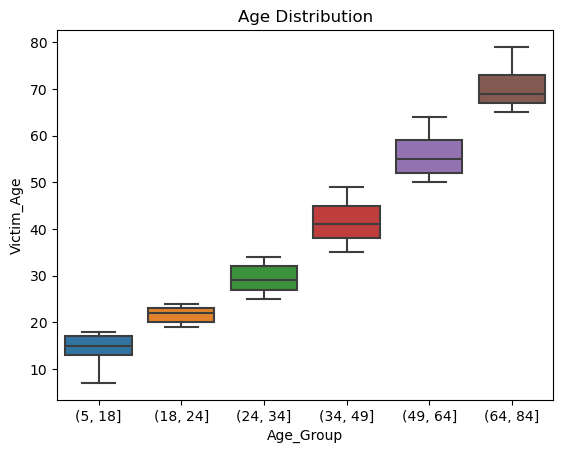

In [29]:
# Define the age bins
age_bins = [5, 18, 24, 34, 49, 64, 84]

# Binning the age groups in the merged_df
merged_df['Victim_Age'] = pd.to_numeric(merged_df['Victim_Age'], errors='coerce')
merged_df['Age_Group'] = pd.cut(x=merged_df['Victim_Age'], bins=age_bins, right=True, include_lowest=False, duplicates="raise")

# Assign the 'Age_Group' column to a new column 'Age_Group' in merged_df
merged_df['Age_Group'] = merged_df['Age_Group']

# Create a box plot for the age distribution
sns.boxplot(x="Age_Group", y="Victim_Age", data=merged_df)
plt.title("Age Distribution")
plt.show()


Age Group: (5, 18], Frequency: 9.08%
Age Group: (18, 24], Frequency: 15.27%
Age Group: (24, 34], Frequency: 26.69%
Age Group: (34, 49], Frequency: 28.91%
Age Group: (49, 64], Frequency: 15.75%
Age Group: (64, 84], Frequency: 4.30%


C:\Users\stewi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\stewi\anaconda3\envs\main\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


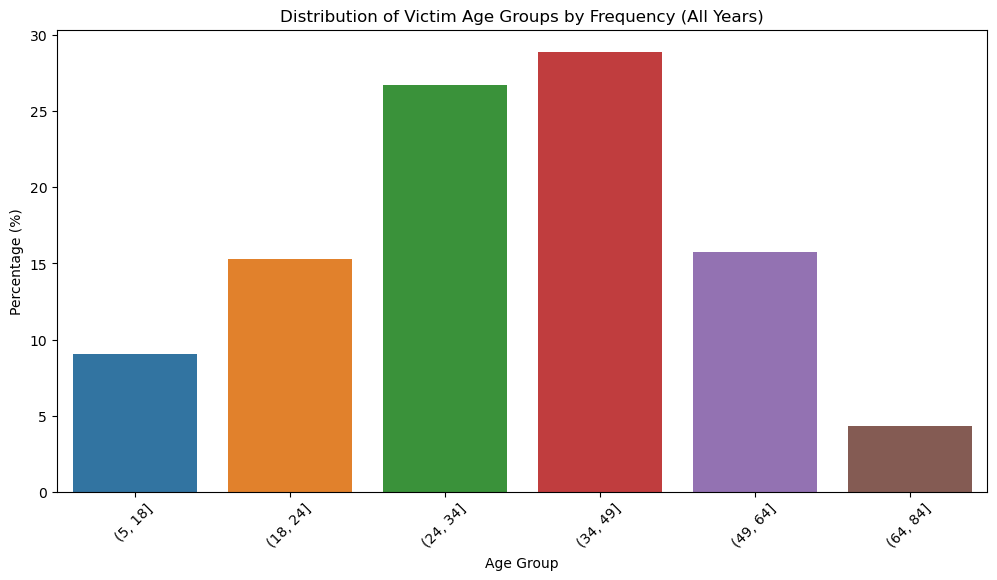

In [30]:
# Calculate the relative frequencies for each binned age group
relative_frequencies = merged_df['Age_Group'].value_counts(normalize=True).sort_index() * 100

# Create a bar chart for the distribution of binned age groups by frequency
plt.figure(figsize=(12, 6))
sns.barplot(x=relative_frequencies.index, y=relative_frequencies.values)

# Set the title and labels for the bar chart
plt.title('Distribution of Victim Age Groups by Frequency (All Years)')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Print out the frequencies
for age_group, frequency in relative_frequencies.items():
    print(f'Age Group: {age_group}, Frequency: {frequency:.2f}%')

plt.show()




In [31]:
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,off_classification_vn,binned_ages_classification,binned_age_numbers,Age_Group
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50.0,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0,Non-Violent,Matured Adult,3,"(49, 64]"
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26.0,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0,Non-Violent,Young Adult,1,"(24, 34]"
4,20120616145104,6/16/12,Not Cleared,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35.0,Black,F,Other/Not Listed ...,Damage/VandalismOfProperty,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0,Non-Violent,Adult,2,"(34, 49]"
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26.0,Black,M,Unknown/Refused ...,Intimidation,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0,Non-Violent,Young Adult,1,"(24, 34]"
6,20120616145203,6/16/12,Not Cleared,1456678,482489,Restaurant/Diner/Coffee Shop ...,Pocket-Picking ...,1.0,62.0,White,F,Other/Not Listed ...,Pocket-Picking,NaN,3.711901e+10,2.69,3.05,516.0,78.9,21.1,194.0,3407.0,555.0,730.0,1233.0,889.0,7,20,37,775.0,419.0,975.0,900.0,1717.0,7055.0,2331.0,Non-Violent,Senior,4,"(49, 64]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,Not Cleared,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28.0,Black,F,Other/Not Listed ...,Robbery,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0,Violent,Young Adult,1,"(24, 34]"
454498,20161231234200,12/31/16,Not Cleared,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34.0,White,M,Hispanic/Latino ...,TheftFromMotorVehicle,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0,Non-Violent,Adult,2,"(24, 34]"
454499,20161231234901,12/31/16,Not Cleared,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22.0,Black,F,Unknown/Refused ...,TheftFromMotorVehicle,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,2

In [32]:
merged_df.to_csv(r"C:\Users\stewi\Downloads\merged3.csv", index = True)
#pd.set_option("display.max_rows", None)
#merged_df.groupby("off_nibrs_classification").size().sort_values()


In [33]:
merged_df['off_nibrs_classification']

Record
1                               MissingPerson
2         TheftofMotorVehiclePartsfromVehicle
4                  Damage/VandalismOfProperty
5                                Intimidation
6                              Pocket-Picking
                         ...                 
454497                                Robbery
454498                  TheftFromMotorVehicle
454499                  TheftFromMotorVehicle
454500             Damage/VandalismOfProperty
454501                           Burglary/B&E
Name: off_nibrs_classification, Length: 198115, dtype: object

In [34]:
merged_df['Age_Group']

Record
1         (49, 64]
2         (24, 34]
4         (34, 49]
5         (24, 34]
6         (49, 64]
            ...   
454497    (24, 34]
454498    (24, 34]
454499    (18, 24]
454500    (49, 64]
454501    (34, 49]
Name: Age_Group, Length: 198115, dtype: category
Categories (6, interval[int64, right]): [(5, 18] < (18, 24] < (24, 34] < (34, 49] < (49, 64] < (64, 84]]

In [35]:
model = ols('binned_age_numbers ~ off_nibrs_classification', data= merged_df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                 sum_sq        df           F  PR(>F)
off_nibrs_classification   30613.434459      60.0  491.053492     0.0
Residual                  205785.901856  198054.0         NaN     NaN


C:\Users\stewi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\stewi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\stewi\anaconda3\envs\main\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


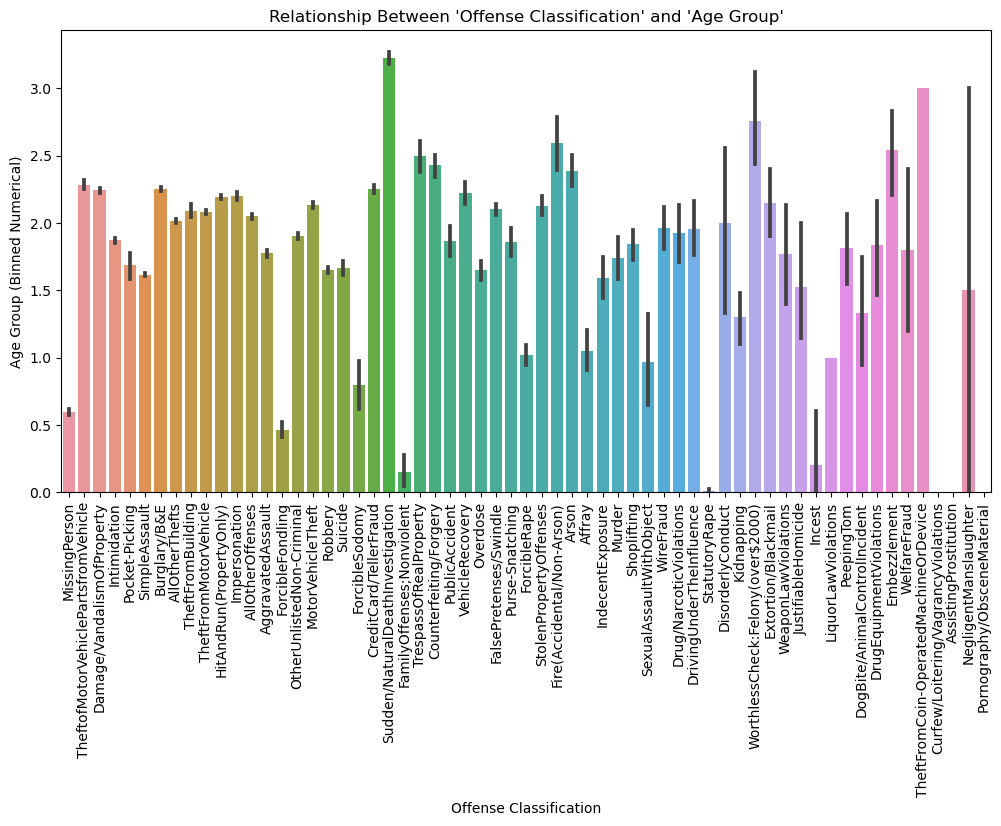

In [36]:

# Create a bar plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.barplot(x='off_nibrs_classification', y='binned_age_numbers', data=merged_df)

plt.title("Relationship Between 'Offense Classification' and 'Age Group'")
plt.xlabel("Offense Classification")
plt.ylabel("Age Group (Binned Numerical)")

plt.xticks(rotation=90)


plt.show()


In [37]:
# Convert the Violent Crimes to binary 1 and Non Violent to 0
merged_df['off_classification_vn'] = merged_df['off_classification_vn'].map({'Violent': 1, 'Non-Violent': 0})

# Calculate the point-biserial correlation
correlation, p_value = pointbiserialr(merged_df['binned_age_numbers'], merged_df['off_classification_vn'])

print(f"Point-Biserial Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")


Point-Biserial Correlation: -0.16
P-value: 0.0000


C:\Users\stewi\AppData\Local\Temp\ipykernel_2712\3669276160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['off_classification_vn'] = merged_df['off_classification_vn'].map({'Violent': 1, 'Non-Violent': 0})


In [38]:
#Linear Regression
#Logistic Regression
#Decision Trees
#Random Forest
#Naive Bayes
#Gradient Boosting (XGBoost)
#K-Nearest Neighbors

In [39]:
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,off_classification_vn,binned_ages_classification,binned_age_numbers,Age_Group
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50.0,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0,0,Matured Adult,3,"(49, 64]"
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26.0,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0,0,Young Adult,1,"(24, 34]"
4,20120616145104,6/16/12,Not Cleared,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35.0,Black,F,Other/Not Listed ...,Damage/VandalismOfProperty,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0,0,Adult,2,"(34, 49]"
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26.0,Black,M,Unknown/Refused ...,Intimidation,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0,0,Young Adult,1,"(24, 34]"
6,20120616145203,6/16/12,Not Cleared,1456678,482489,Restaurant/Diner/Coffee Shop ...,Pocket-Picking ...,1.0,62.0,White,F,Other/Not Listed ...,Pocket-Picking,NaN,3.711901e+10,2.69,3.05,516.0,78.9,21.1,194.0,3407.0,555.0,730.0,1233.0,889.0,7,20,37,775.0,419.0,975.0,900.0,1717.0,7055.0,2331.0,0,Senior,4,"(49, 64]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,Not Cleared,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28.0,Black,F,Other/Not Listed ...,Robbery,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0,1,Young Adult,1,"(24, 34]"
454498,20161231234200,12/31/16,Not Cleared,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34.0,White,M,Hispanic/Latino ...,TheftFromMotorVehicle,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0,0,Adult,2,"(24, 34]"
454499,20161231234901,12/31/16,Not Cleared,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22.0,Black,F,Unknown/Refused ...,TheftFromMotorVehicle,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,210.0,1146.0,403.0,181.0,361.0,201.0,19,34,2,592.0,236.0,506.0,336.

In [40]:
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,NIBRS_Hi_Class,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,off_classification_vn,binned_ages_classification,binned_age_numbers,Age_Group
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,Missing Person ...,1.0,50.0,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0,0,Matured Adult,3,"(49, 64]"
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,Theft of Motor Vehicle Parts from Vehicle ...,1.0,26.0,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0,0,Young Adult,1,"(24, 34]"
4,20120616145104,6/16/12,Not Cleared,1453368,579593,Private Residence ...,Damage/Vandalism Of Property ...,1.0,35.0,Black,F,Other/Not Listed ...,Damage/VandalismOfProperty,NaN,3.711901e+10,2.9,3.64,754.0,59.8,40.2,715.0,3744.0,1190.0,1068.0,1218.0,268.0,22,13,10,1783.0,1359.0,1601.0,962.0,2754.0,4106.0,1092.0,0,Adult,2,"(34, 49]"
5,20120616145201,6/16/12,6/18/12,1488226,537239,Private Residence ...,Intimidation ...,1.0,26.0,Black,M,Unknown/Refused ...,Intimidation,NaN,3.711900e+10,2.81,3.57,598.0,46.7,53.3,419.0,3047.0,820.0,619.0,1125.0,483.0,27,14,3,801.0,635.0,1103.0,984.0,2021.0,2937.0,447.0,0,Young Adult,1,"(24, 34]"
6,20120616145203,6/16/12,Not Cleared,1456678,482489,Restaurant/Diner/Coffee Shop ...,Pocket-Picking ...,1.0,62.0,White,F,Other/Not Listed ...,Pocket-Picking,NaN,3.711901e+10,2.69,3.05,516.0,78.9,21.1,194.0,3407.0,555.0,730.0,1233.0,889.0,7,20,37,775.0,419.0,975.0,900.0,1717.0,7055.0,2331.0,0,Senior,4,"(49, 64]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454497,20161231234101,12/31/16,Not Cleared,1448960,542949,Other - Commercial Place ...,Robbery ...,1.0,28.0,Black,F,Other/Not Listed ...,Robbery,"Personal Weapons (hands,feet,teeth,etc.)",3.711900e+10,1.42,2.15,16.0,17.7,82.3,254.0,2030.0,1007.0,445.0,474.0,104.0,4,13,29,30.0,786.0,920.0,354.0,1586.0,4148.0,1579.0,1,Young Adult,1,"(24, 34]"
454498,20161231234200,12/31/16,Not Cleared,1474872,564567,Bar/Tavern/Nightclub ...,Theft From Motor Vehicle ...,1.0,34.0,White,M,Hispanic/Latino ...,TheftFromMotorVehicle,NaN,3.711901e+10,2.41,3.16,415.0,47.6,52.4,745.0,4676.0,1637.0,703.0,1512.0,824.0,5,22,20,712.0,1608.0,1317.0,1278.0,3694.0,7736.0,2159.0,0,Adult,2,"(24, 34]"
454499,20161231234901,12/31/16,Not Cleared,1482291,554972,Private Residence ...,Theft From Motor Vehicle ...,1.0,22.0,Black,F,Unknown/Refused ...,TheftFromMotorVehicle,NaN,3.711901e+10,3.61,3.83,330.0,62.7,37.3,210.0,1146.0,403.0,181.0,361.0,201.0,19,34,2,592.0,236.0,506.0,336.

In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
merged_df = pd.get_dummies(merged_df, columns=['NIBRS_Hi_Class'], prefix = ['dummy'])
merged_df

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,off_classification_vn,binned_ages_classification,binned_age_numbers,Age_Group,dummy_Affray,dummy_Aggravated Assault,dummy_All Other Offenses,dummy_All Other Thefts,dummy_Arson,dummy_Assisting Prostitution,dummy_Burglary/B&E,dummy_Counterfeiting/Forgery,dummy_Credit Card/Teller Fraud,dummy_Curfew/Loitering/Vagrancy Violations,dummy_Damage/Vandalism Of Property,dummy_Disorderly Conduct,dummy_Dog Bite/Animal Control Incident,dummy_Driving Under The Influence,dummy_Drug Equipment Violations,dummy_Drug/Narcotic Violations,dummy_Embezzlement,dummy_Extortion/Blackmail,dummy_False Pretenses/Swindle,dummy_Family Offenses; Nonviolent,dummy_Fire (Accidental/Non-Arson),dummy_Forcible Fondling,dummy_Forcible Rape,dummy_Forcible Sodomy,dummy_Hit And Run (Property Only),dummy_Impersonation,dummy_Incest,dummy_Indecent Exposure,dummy_Intimidation,dummy_Justifiable Homicide,dummy_Kidnapping,dummy_Liquor Law Violations,dummy_Missing Person,dummy_Motor Vehicle Theft,dummy_Murder,dummy_Negligent Manslaughter,dummy_Other Unlisted Non-Criminal,dummy_Overdose,dummy_Peeping Tom,dummy_Pocket-Picking,dummy_Pornography/Obscene Material,dummy_Public Accident,dummy_Purse-Snatching,dummy_Robbery,dummy_Sexual Assault With Object,dummy_Shoplifting,dummy_Simple Assault,dummy_Statutory Rape,dummy_Stolen Property Offenses,dummy_Sudden/Natural Death Investigation,dummy_Suicide,dummy_Theft From Building,dummy_Theft From Coin-Operated Machine Or Device,dummy_Theft From Motor Vehicle,dummy_Theft of Motor Vehicle Parts from Vehicle,dummy_Trespass Of Real Property,dummy_Vehicle Recovery,dummy_Weapon Law Violations,dummy_Welfare Fraud,dummy_Wire Fraud,dummy_Worthless Check: Felony (over $2000)
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,1.0,50.0,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0,0,Matured Adult,3,"(49, 64]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,1.0,26.0,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0,0,Young Adult,1,"(24, 34]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [43]:
# Replace '-' with NaN in the entire DataFrame
merged_df.replace('-', np.nan, inplace=True)
merged_df.dropna(subset=['binned_ages_classification'])

# Now, you can convert the entire DataFrame to numeric type
#merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

,Complaint_No,Reported_Date,Clearance_Date,X_Coordinate,Y_Coordinate,Location_Type,Victim_No,Victim_Age,Victim_Race,Victim_Gender,Victim_Ethnicity,off_nibrs_classification,Weapon_Type,GEOID20,Estimate!!Total!!HOUSEHOLDS!!Average household size,Estimate!!Total!!FAMILIES!!Average family size,Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years,Owner_Occupied_Households,Renter_Occupied_Households,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Aged 5-19,Aged 20-29,Aged 30-44,Aged 45-59,Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,off_classification_vn,binned_ages_classification,binned_age_numbers,Age_Group,dummy_Affray,dummy_Aggravated Assault,dummy_All Other Offenses,dummy_All Other Thefts,dummy_Arson,dummy_Assisting Prostitution,dummy_Burglary/B&E,dummy_Counterfeiting/Forgery,dummy_Credit Card/Teller Fraud,dummy_Curfew/Loitering/Vagrancy Violations,dummy_Damage/Vandalism Of Property,dummy_Disorderly Conduct,dummy_Dog Bite/Animal Control Incident,dummy_Driving Under The Influence,dummy_Drug Equipment Violations,dummy_Drug/Narcotic Violations,dummy_Embezzlement,dummy_Extortion/Blackmail,dummy_False Pretenses/Swindle,dummy_Family Offenses; Nonviolent,dummy_Fire (Accidental/Non-Arson),dummy_Forcible Fondling,dummy_Forcible Rape,dummy_Forcible Sodomy,dummy_Hit And Run (Property Only),dummy_Impersonation,dummy_Incest,dummy_Indecent Exposure,dummy_Intimidation,dummy_Justifiable Homicide,dummy_Kidnapping,dummy_Liquor Law Violations,dummy_Missing Person,dummy_Motor Vehicle Theft,dummy_Murder,dummy_Negligent Manslaughter,dummy_Other Unlisted Non-Criminal,dummy_Overdose,dummy_Peeping Tom,dummy_Pocket-Picking,dummy_Pornography/Obscene Material,dummy_Public Accident,dummy_Purse-Snatching,dummy_Robbery,dummy_Sexual Assault With Object,dummy_Shoplifting,dummy_Simple Assault,dummy_Statutory Rape,dummy_Stolen Property Offenses,dummy_Sudden/Natural Death Investigation,dummy_Suicide,dummy_Theft From Building,dummy_Theft From Coin-Operated Machine Or Device,dummy_Theft From Motor Vehicle,dummy_Theft of Motor Vehicle Parts from Vehicle,dummy_Trespass Of Real Property,dummy_Vehicle Recovery,dummy_Weapon Law Violations,dummy_Welfare Fraud,dummy_Wire Fraud,dummy_Worthless Check: Felony (over $2000)
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20120616144301,6/16/12,6/16/12,1446430,583618,Residential Care Facility ...,1.0,50.0,Black,M,Other/Not Listed ...,MissingPerson,NaN,3.711901e+10,1.87,2.4,564.0,0,100,157.0,2545.0,1430.0,669.0,433.0,13.0,12,25,3,558.0,818.0,1438.0,416.0,2516.0,4157.0,1677.0,0,Matured Adult,3,"(49, 64]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,20120616144400,6/16/12,Not Cleared,1459634,549425,Apartment/Duplex Private Res ...,1.0,26.0,White,F,Unknown/Refused ...,TheftofMotorVehiclePartsfromVehicle,NaN,3.711900e+10,1.62,2.61,0.0,22.4,77.6,107.0,912.0,453.0,155.0,255.0,49.0,13,11,14,40.0,289.0,426.0,214.0,763.0,1330.0,459.0,0,Young Adult,1,"(24, 34]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [44]:
pd.set_option("display.max_rows", 1000)
#merged_df.groupby("Location_Type").size().sort_values()
#pd.reset_option('display.max_rows')
merged_df.columns = merged_df.columns.str.replace('-', '')
list(merged_df)

['Complaint_No',
 'Reported_Date',
 'Clearance_Date',
 'X_Coordinate',
 'Y_Coordinate',
 'Location_Type',
 'Victim_No',
 'Victim_Age',
 'Victim_Race',
 'Victim_Gender',
 'Victim_Ethnicity',
 'off_nibrs_classification',
 'Weapon_Type',
 'GEOID20',
 'Estimate!!Total!!HOUSEHOLDS!!Average household size',
 'Estimate!!Total!!FAMILIES!!Average family size',
 'Estimate!!Total!!AGE OF OWN CHILDREN!!Households with own children of the householder under 18 years',
 'Owner_Occupied_Households',
 'Renter_Occupied_Households',
 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years',
 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over',
 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 to 34 years',
 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 35 to 44 years',
 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 45 to 64 years',
 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 65 years and over',
 'Low 

In [45]:
merged_df['binned_ages_classification']

Record
1         Matured Adult
2           Young Adult
4                 Adult
5           Young Adult
6                Senior
              ...      
454497      Young Adult
454498            Adult
454499      Young Adult
454500           Senior
454501            Adult
Name: binned_ages_classification, Length: 198115, dtype: category
Categories (5, object): ['Child' < 'Young Adult' < 'Adult' < 'Matured Adult' < 'Senior']

In [46]:
merged_df.dropna

<bound method DataFrame.dropna of           Complaint_No Reported_Date Clearance_Date X_Coordinate Y_Coordinate  \
Record                                                                          
1       20120616144301       6/16/12        6/16/12      1446430       583618   
2       20120616144400       6/16/12    Not Cleared      1459634       549425   
4       20120616145104       6/16/12    Not Cleared      1453368       579593   
5       20120616145201       6/16/12        6/18/12      1488226       537239   
6       20120616145203       6/16/12    Not Cleared      1456678       482489   
...                ...           ...            ...          ...          ...   
454497  20161231234101      12/31/16    Not Cleared      1448960       542949   
454498  20161231234200      12/31/16    Not Cleared      1474872       564567   
454499  20161231234901      12/31/16    Not Cleared      1482291       554972   
454500  20161231235000      12/31/16    Not Cleared      1441206       5511

In [47]:
# create training and testing sets
from sklearn.model_selection import train_test_split
crime_train, crime_test = train_test_split(merged_df, test_size =0.25, random_state = 1)
print(crime_test.shape)
print(crime_train.shape)

(49529, 100)
(148586, 100)


In [48]:
# for learning our tree we want to use age, c_charge_degree, race, sex, priors_count
x = crime_train[[ 'Low Income (less than 74,998)',
 'Medium Income (75,000 through 149,998)',
 'High Income (greater than 149,998)',  'Less Than High School Graduate',
 'High School Graduate or Higher', 'Bachelors Degree or Higher',  
                 
 'dummy_Affray                                                                                              ',
 'dummy_Aggravated Assault                                                                                  ',
 'dummy_All Other Offenses                                                                                  ',
 'dummy_All Other Thefts                                                                                    ',
 'dummy_Arson                                                                                               ',
 'dummy_Assisting Prostitution                                                                              ',
 'dummy_Burglary/B&E                                                                                        ',
 'dummy_Counterfeiting/Forgery                                                                              ',
 'dummy_Credit Card/Teller Fraud                                                                            ',
 'dummy_Curfew/Loitering/Vagrancy Violations                                                                ',
 'dummy_Damage/Vandalism Of Property                                                                        ',
 'dummy_Disorderly Conduct                                                                                  ',
 'dummy_Dog Bite/Animal Control Incident                                                                    ',
 'dummy_Driving Under The Influence                                                                         ',
 'dummy_Drug Equipment Violations                                                                           ',
 'dummy_Drug/Narcotic Violations                                                                            ',
 'dummy_Embezzlement                                                                                        ',
 'dummy_Extortion/Blackmail                                                                                 ',
 'dummy_False Pretenses/Swindle                                                                             ',
 'dummy_Family Offenses; Nonviolent                                                                         ',
 'dummy_Fire (Accidental/NonArson)                                                                         ',
 'dummy_Forcible Fondling                                                                                   ',
 'dummy_Forcible Rape                                                                                       ',
 'dummy_Forcible Sodomy                                                                                     ',
 'dummy_Hit And Run (Property Only)                                                                         ',
 'dummy_Impersonation                                                                                       ',
 'dummy_Incest                                                                                              ',
 'dummy_Indecent Exposure                                                                                   ',
 'dummy_Intimidation                                                                                        ',
 'dummy_Justifiable Homicide                                                                                ',
 'dummy_Kidnapping                                                                                          ',
 'dummy_Liquor Law Violations                                                                               ',
 'dummy_Missing Person                                                                                      ',
 'dummy_Motor Vehicle Theft                                                                                 ',
 'dummy_Murder                                                                                              ',
 'dummy_Negligent Manslaughter                                                                              ',
 'dummy_Other Unlisted NonCriminal                                                                         ',
 'dummy_Overdose                                                                                            ',
 'dummy_Peeping Tom                                                                                         ',
 'dummy_PocketPicking                                                                                      ',
 'dummy_Pornography/Obscene Material                                                                        ',
 'dummy_Public Accident                                                                                     ',
 'dummy_PurseSnatching                                                                                     ',
 'dummy_Robbery                                                                                             ',
 'dummy_Sexual Assault With Object                                                                          ',
 'dummy_Shoplifting                                                                                         ',
 'dummy_Simple Assault                                                                                      ',
 'dummy_Statutory Rape                                                                                      ',
 'dummy_Stolen Property Offenses                                                                            ',
 'dummy_Sudden/Natural Death Investigation                                                                  ',
 'dummy_Suicide                                                                                             ',
 'dummy_Theft From Building                                                                                 ',
 'dummy_Theft From CoinOperated Machine Or Device                                                          ',
 'dummy_Theft From Motor Vehicle                                                                            ',
 'dummy_Theft of Motor Vehicle Parts from Vehicle                                                           ',
 'dummy_Trespass Of Real Property                                                                           ',
 'dummy_Vehicle Recovery                                                                                    ',
 'dummy_Weapon Law Violations                                                                               ',
 'dummy_Welfare Fraud                                                                                       ',
 'dummy_Wire Fraud                                                                                          ',
 'dummy_Worthless Check: Felony (over $2000)                                                                ']]
x


,"Low Income (less than 74,998)","Medium Income (75,000 through 149,998)","High Income (greater than 149,998)",Less Than High School Graduate,High School Graduate or Higher,Bachelors Degree or Higher,dummy_Affray,dummy_Aggravated Assault,dummy_All Other Offenses,dummy_All Other Thefts,dummy_Arson,dummy_Assisting Prostitution,dummy_Burglary/B&E,dummy_Counterfeiting/Forgery,dummy_Credit Card/Teller Fraud,dummy_Curfew/Loitering/Vagrancy Violations,dummy_Damage/Vandalism Of Property,dummy_Disorderly Conduct,dummy_Dog Bite/Animal Control Incident,dummy_Driving Under The Influence,dummy_Drug Equipment Violations,dummy_Drug/Narcotic Violations,dummy_Embezzlement,dummy_Extortion/Blackmail,dummy_False Pretenses/Swindle,dummy_Family Offenses; Nonviolent,dummy_Fire (Accidental/NonArson),dummy_Forcible Fondling,dummy_Forcible Rape,dummy_Forcible Sodomy,dummy_Hit And Run (Property Only),dummy_Impersonation,dummy_Incest,dummy_Indecent Exposure,dummy_Intimidation,dummy_Justifiable Homicide,dummy_Kidnapping,dummy_Liquor Law Violations,dummy_Missing Person,dummy_Motor Vehicle Theft,dummy_Murder,dummy_Negligent Manslaughter,dummy_Other Unlisted NonCriminal,dummy_Overdose,dummy_Peeping Tom,dummy_PocketPicking,dummy_Pornography/Obscene Material,dummy_Public Accident,dummy_PurseSnatching,dummy_Robbery,dummy_Sexual Assault With Object,dummy_Shoplifting,dummy_Simple Assault,dummy_Statutory Rape,dummy_Stolen Property Offenses,dummy_Sudden/Natural Death Investigation,dummy_Suicide,dummy_Theft From Building,dummy_Theft From CoinOperated Machine Or Device,dummy_Theft From Motor Vehicle,dummy_Theft of Motor Vehicle Parts from Vehicle,dummy_Trespass Of Real Property,dummy_Vehicle Recovery,dummy_Weapon Law Violations,dummy_Welfare Fraud,dummy_Wire Fraud,dummy_Worthless Check: Felony (over $2000)
Record,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48643,18,14,3,835.0,1234.0,317.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97266,11,3,5,1217.0,1778.0,266.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
67122,5,16,22,1255.0,3372.0,1247.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
101243,0,17,15,510.0,1674.0,506.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
52706,8,4,4,425.0,1053.0,171.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [49]:
# we want to predict the score text let's make that our y
y = crime_train['binned_ages_classification']
y

Record
48643             Adult
97266       Young Adult
67122             Adult
101243            Adult
52706     Matured Adult
              ...      
100264            Adult
149413            Adult
68073     Matured Adult
7061      Matured Adult
358400            Adult
Name: binned_ages_classification, Length: 148586, dtype: category
Categories (5, object): ['Child' < 'Young Adult' < 'Adult' < 'Matured Adult' < 'Senior']

In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [51]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

Train, Test = train_test_split(merged_df, test_size=.25,random_state=298)

#Small number of folds since small dataset
my_cv = KFold(n_splits=4,shuffle=True,random_state=178)

In [52]:
Test['binned_ages_classification'].value_counts(normalize=True)

binned_ages_classification
Adult            0.334410
Young Adult      0.269822
Matured Adult    0.217004
Child            0.091038
Senior           0.087726
Name: proportion, dtype: float64

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
cart01 = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(x,y)
c50_01 = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=5).fit(x,y)
rf01 = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(x,y)

In [55]:
prediction_cart01 = cart01.predict(x)
prediction_c50_01 = c50_01.predict(x)
prediction_rf01 = rf01.predict(x)

In [56]:
majority = merged_df['binned_ages_classification'].value_counts().max()
print(majority)

66764


# BASELINE 

In [57]:
(majority/len(merged_df))*100

33.69961890820988

In [58]:
# create a function that we can use to check how our predictions compare to the actual values
def eval_prediction(pred, actual):
    index = 0
    correct = 0
    for outcome in actual:
        if pred[index] == outcome:
            correct += 1

        index+=1
    return correct

In [59]:
#Using the evaluation function to see how many we got correct for each model 
print("CART:", eval_prediction(prediction_cart01, y))
print("C5.0:", eval_prediction(prediction_c50_01, y))
print("Random Forest:", eval_prediction(prediction_rf01, y))

CART: 54640
C5.0: 54640
Random Forest: 64936


In [60]:
print("CART:", '{0:.2f}'.format((eval_prediction(prediction_cart01, y)/len(x))*100),"%")
print("C5.0:", '{0:.2f}'.format((eval_prediction(prediction_c50_01, y)/len(x))*100),"%")
print("Random Forest:", '{0:.2f}'.format((eval_prediction(prediction_rf01, y)/len(x))*100),"%")

CART: 36.77 %
C5.0: 36.77 %
Random Forest: 43.70 %


In [61]:
print(cart01.score(x,y))
print(c50_01.score(x,y))
print(rf01.score(x,y))

0.36773316463193034
0.36773316463193034
0.43702636856769816


In [62]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

hist_gb = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hist_gb.fit(x_train, y_train)

y_pred = hist_gb.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


C:\Users\stewi\anaconda3\envs\main\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Accuracy: 0.38959553132781477


In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np



x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)


xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)


y_pred = xgb_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.3897974291675079


In [66]:
x_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

model = XGBClassifier(random_state=34)

# Cross-validation
accuracies = cross_val_score(model, X=x, y=y_encoded, cv=my_cv)

print(f'Average accuracy of folds: {np.mean(accuracies)} \n')
print(f'Standard deviation of accuracy of folds: {np.std(accuracies)} \n')

# Performance on the training set
model.fit(X=x ,y=y_encoded)

# Predictions on the test set
predictions = model.predict(x_test)

test_acc = accuracy_score(y_test, predictions)

print(f'Accuracy on the test set: {test_acc}')


Accuracy: 0.3897974291675079
Average accuracy of folds: 0.3868466848690895 

Standard deviation of accuracy of folds: 0.001877479810383916 

Accuracy on the test set: 0.41523655696884043


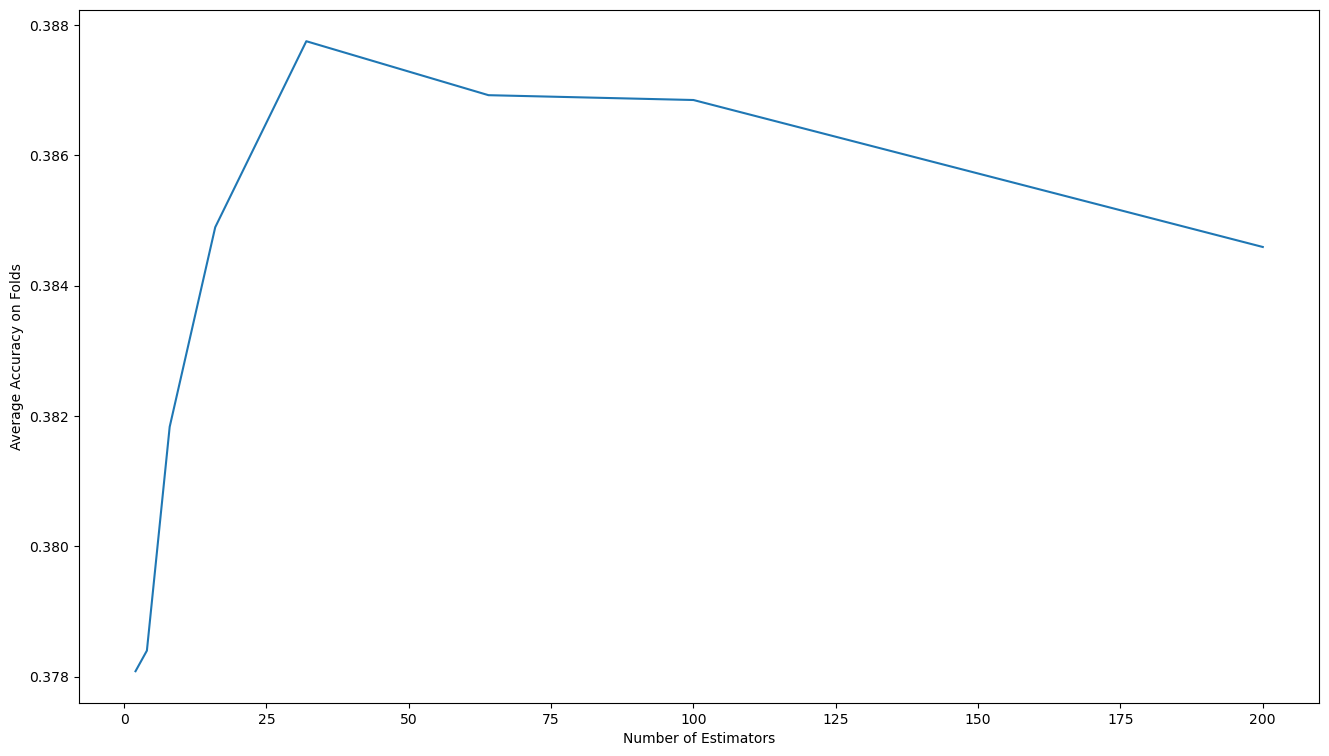

In [67]:
# Adjusting the code for the number of estimators and plotting
n_estimators = [2, 4, 8, 16, 32, 64, 100, 200]
estimator_acc = []

# Looping through the number of estimators and finding the best
#35
for estimator in n_estimators:
    model = XGBClassifier(random_state=34, n_estimators=estimator)

    accuracies = cross_val_score(model, X=x, y=y_encoded, cv=my_cv)

    estimator_acc.append(np.mean(accuracies))

plt.figure(figsize=(16, 9))
plt.plot(n_estimators, estimator_acc)
plt.xlabel('Number of Estimators')
plt.ylabel('Average Accuracy on Folds')
plt.show()

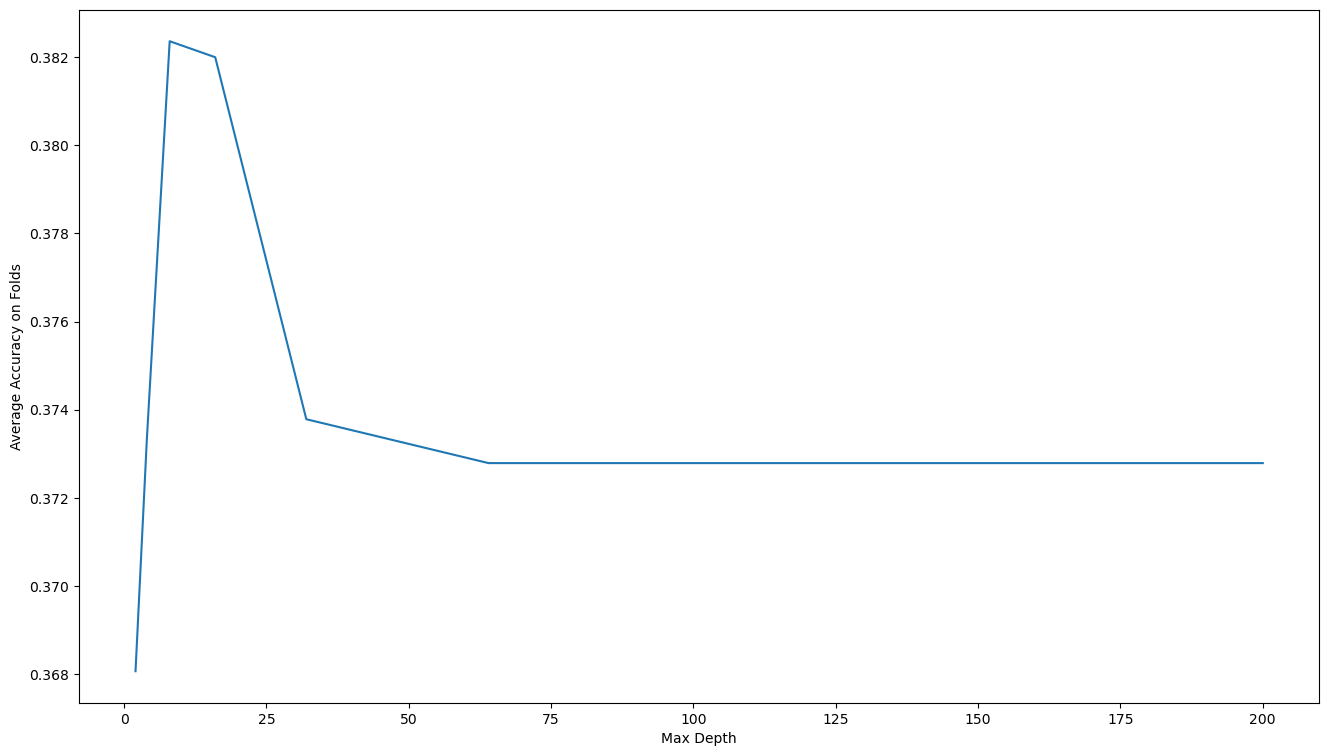

In [68]:

max_depths = [2, 4, 8, 16, 32, 64, 100, 200]
depth_acc = []

# Looping through the number of max depths and finding the best
for depth in max_depths:
    model = XGBClassifier(random_state=34, n_estimators=2, max_depth=depth)

    accuracies = cross_val_score(model, X=x, y=y_encoded, cv=my_cv)

    depth_acc.append(np.mean(accuracies))

plt.figure(figsize=(16, 9))
plt.plot(max_depths, depth_acc)
plt.xlabel('Max Depth')
plt.ylabel('Average Accuracy on Folds')
plt.show()

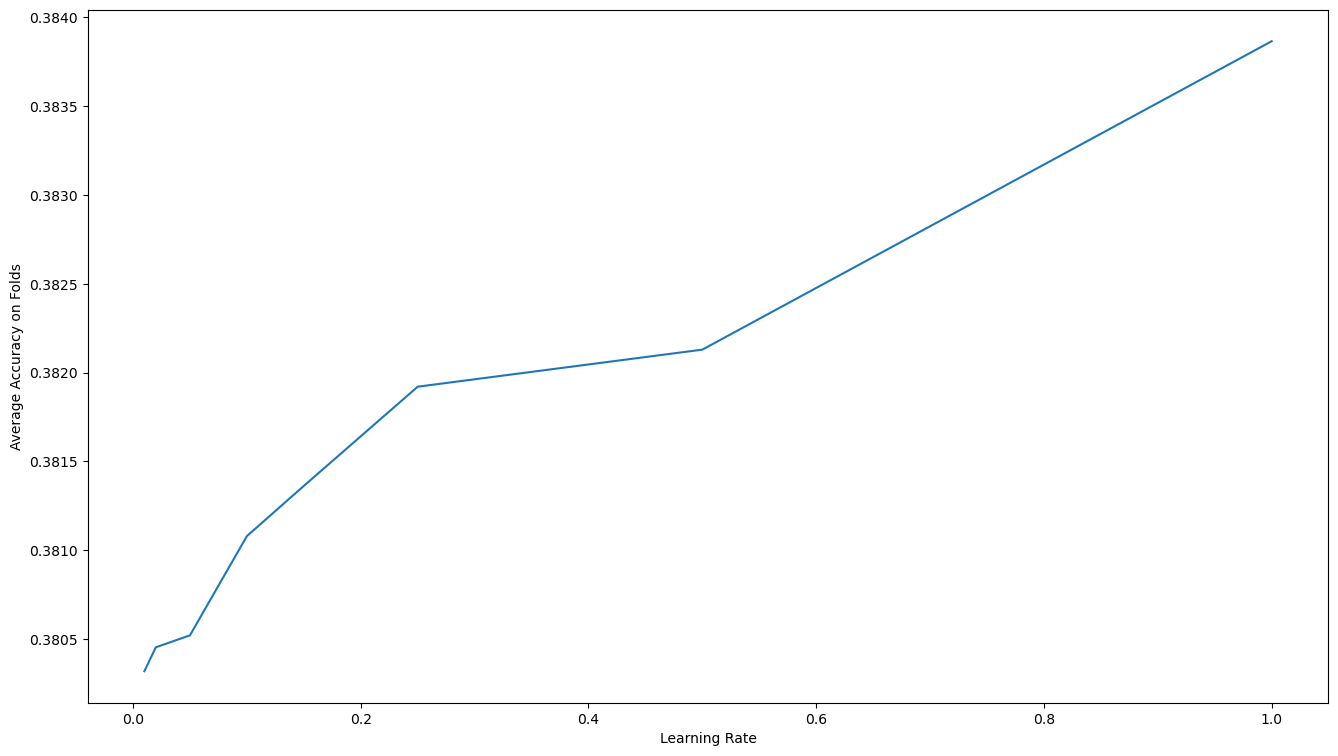

In [69]:

learning_rates = [0.01, 0.02, 0.05, 0.1, 0.15, 0.25, 0.5, 1]
rate_acc = []

# Looping through the learning rates and finding the best
for rate in learning_rates:
    model = XGBClassifier(random_state=34, n_estimators=2, learning_rate=rate, max_depth=8)

    accuracies = cross_val_score(model, X=x, y=y_encoded, cv=my_cv)

    rate_acc.append(np.mean(accuracies))

plt.figure(figsize=(16, 9))
plt.plot(learning_rates, rate_acc)
plt.xlabel('Learning Rate')
plt.ylabel('Average Accuracy on Folds')
plt.show()

# RETEST BASED OFF OF HYPERPARAMTER TUNING TO SEE THE NEW ACCURACY SCORE

In [70]:

# Fix the random state
model = XGBClassifier(random_state=35, n_estimators=35, max_depth=12, learning_rate=1)

accuracies = cross_val_score(model, X=x, y=y_encoded, cv=my_cv)

print(f'Average accuracy of folds: {np.mean(accuracies)} \n')
print(f'Standard deviation of accuracy of folds: {np.std(accuracies)} \n')

# Performance on the training set
model.fit(X=x, y=y_encoded)

# Predictions on the test set
predictions = model.predict(x_test)

test_acc = accuracy_score(y_test, predictions)

print(f'Accuracy on the test set: {test_acc}')


Average accuracy of folds: 0.3734402988998769 

Standard deviation of accuracy of folds: 0.0011660735064973429 

Accuracy on the test set: 0.4339121071404536


In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

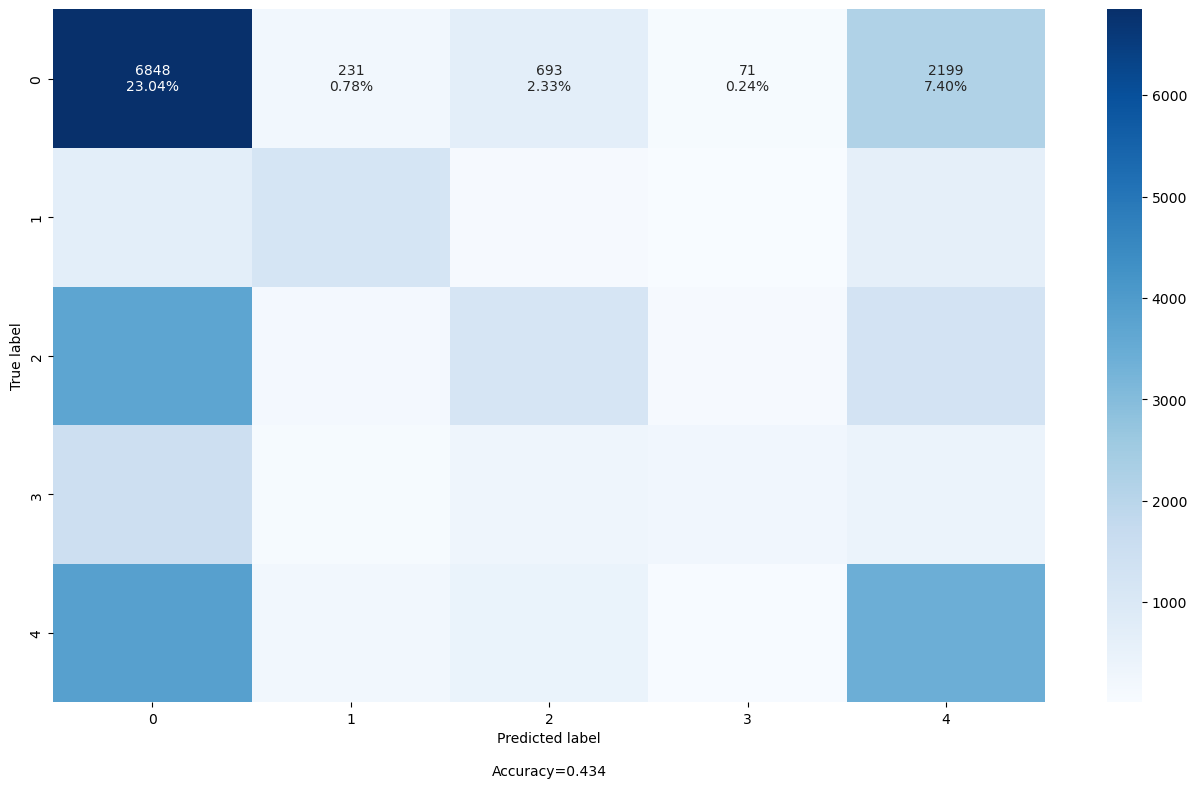

In [72]:
make_confusion_matrix(confusion_matrix(y_test ,predictions),
                     figsize=(16,9))

Average accuracy of folds: 0.3734402988998769 

Standard deviation of accuracy of folds: 0.0011660735064973429 



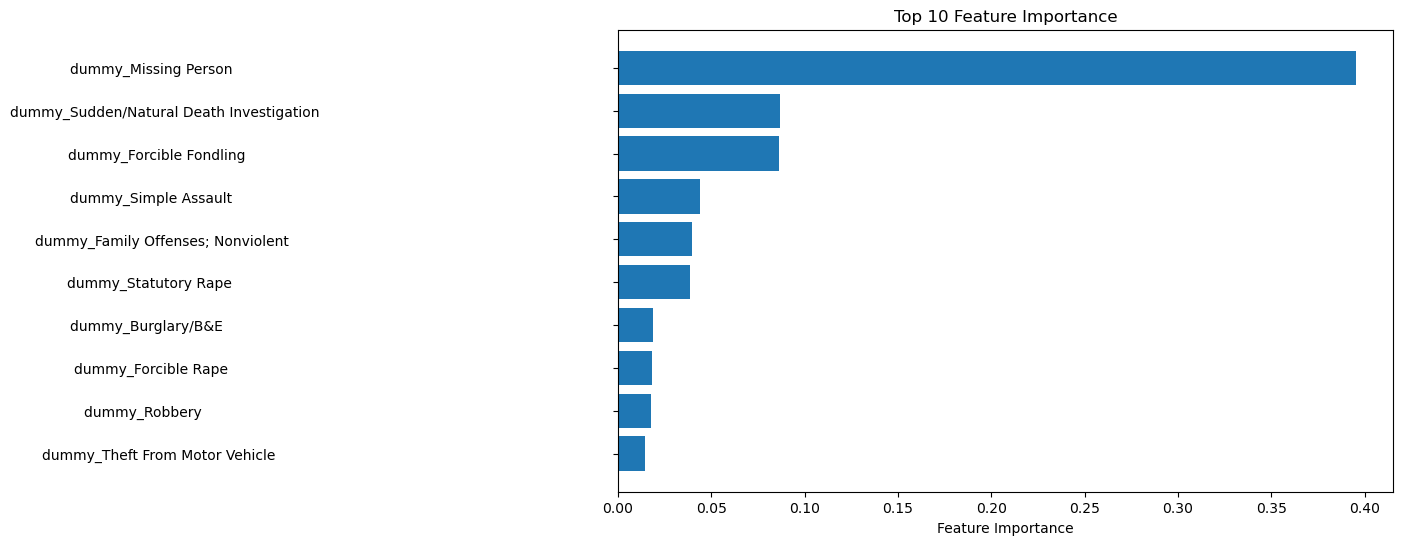

In [73]:
# Fix the random state
model = XGBClassifier(random_state=35, n_estimators=35, max_depth=12, learning_rate=1)

# Perform cross-validation
accuracies = cross_val_score(model, X=x, y=y_encoded, cv=my_cv)

print(f'Average accuracy of folds: {np.mean(accuracies)} \n')
print(f'Standard deviation of accuracy of folds: {np.std(accuracies)} \n')

# Performance on the training set
model.fit(X=x, y=y_encoded)

# Feature Importance Plot
def plot_feature_importance(model, feature_names, num_features=10):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[-num_features:]
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title("Top {} Feature Importance".format(num_features))
    plt.show()

# Get feature names from your dataset
feature_names = list(x.columns)  # Assuming x is a DataFrame

# Plot feature importance
plot_feature_importance(model, feature_names, num_features=10)


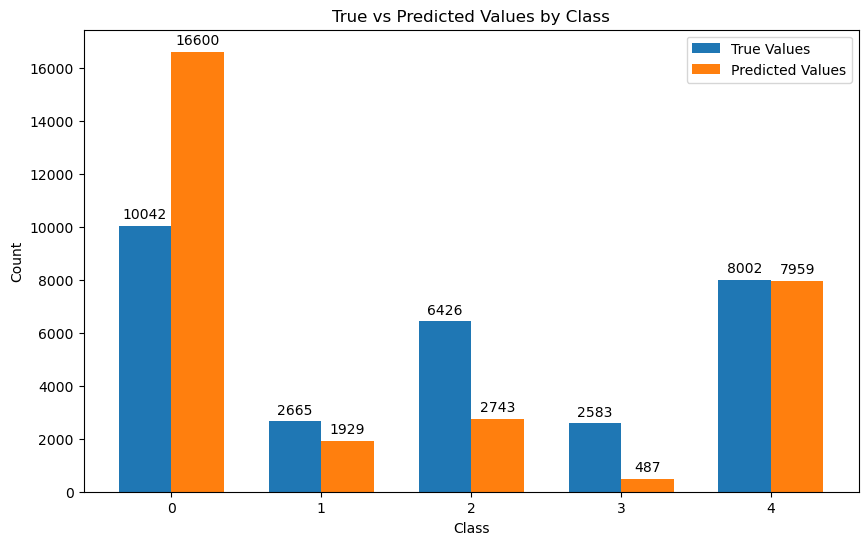

In [74]:
# Get unique class labels
classes = np.unique(np.concatenate((y_test, predictions)))

# Calculate the number of occurrences for each class in y_test
true_counts = np.bincount(y_test)

# Calculate the number of occurrences for each class in predictions
pred_counts = np.bincount(predictions)

# Combine the true and predicted counts
combined_counts = np.vstack((true_counts, pred_counts))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart
bar_width = 0.35
bar_positions = np.arange(len(classes))
true_bars = ax.bar(bar_positions, combined_counts[0], bar_width, label='True Values')
pred_bars = ax.bar(bar_positions + bar_width, combined_counts[1], bar_width, label='Predicted Values')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('True vs Predicted Values by Class')
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(classes)
ax.legend()

# Display the counts on top of the bars
for true_bar, pred_bar in zip(true_bars, pred_bars):
    true_height = true_bar.get_height()
    pred_height = pred_bar.get_height()
    ax.annotate('{}'.format(true_height),
                xy=(true_bar.get_x() + true_bar.get_width() / 2, true_height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    ax.annotate('{}'.format(pred_height),
                xy=(pred_bar.get_x() + pred_bar.get_width() / 2, pred_height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()
